In [2]:
import geopandas as gpd

# NOTE: Download GeoJSON table option from below link, save to 'data' directory: 
# LINK: https://hub.arcgis.com/datasets/UrbanObservatory::fast-food-restaurants/explore?layer=0&showTable=true

fast_food_gdf = gpd.read_file('data/Fast_Food_Restaurants.geojson').set_crs(4326)
fast_food_gdf

,OBJECTID,ID,Letter,Address,City,State,Zip,Phone,Lat,Long_,Restaurant,geometry
0,1,1,b,3601 N.W. 27th Avenue,Miami,FL,33142,(305) 638-3838,25.8092,-80.2400,Burger King,POINT (-80.24000 25.80920)
1,2,2,b,8995 N. W. 7th Avenue,Miami,FL,33150,(305) 754-8453,25.8587,-80.2094,Burger King,POINT (-80.20940 25.85870)
2,3,3,b,30390 South Dixie Highway,Homestead,FL,33030,(305) 247-7181,25.4849,-80.4610,Burger King,POINT (-80.46100 25.48490)
3,4,4,b,7975 N. W. 27th Avenue,Miami,FL,33147,(305) 836-8152,25.8471,-80.2415,Burger King,POINT (-80.24150 25.84710)
4,5,5,b,9201 South Dixie Highway,Miami,FL,33156,(305) 666-1130,25.6849,-80.3125,Burger King,POINT (-80.31250 25.68490)
...,...,...,...,...,...,...,...,...,...,...,...,...
49997,49998,49998,w,Uscd Q-076 Price Center,La Jolla,CA,92093,None,32.8789,-117.2310,Wendy's,POINT (-117.23100 32.87890)
49998,49999,49999,w,Village At Wexford #278,Hilton Head Island,SC,29928,None,32.2162,-80.7098,Wendy's,POINT (-80.70980 32.21620)
49999,50000,50000,w,W V Rt 7,Morgantown,WV,26505,None,39.6321,-79.9568,Wendy's,POINT (-79.95680 39.63210)
50000,50001,50001,w,Westfall Town Ctr Rt 209,Matamoras,PA,18336,None,41.3709,-74.6981,Wendy's,POINT (-74.69810 41.37090)


In [21]:
import httpx

from os import path

def get_cached_file(file_name: str, download_url: str, file_handler):
    file_path = f'data/{file_name}'
    if not path.exists(file_path):
        resp = httpx.get(download_url)
        if resp.status_code == 200:
            with open(file_path, 'wb') as f:
                f.write(resp.content)
        else:
            resp.raise_for_status()
    return file_handler(file_path)

# https://www2.census.gov/geo/tiger/TIGER2019/CBSA/
census_blocks_gdf = get_cached_file('tl_2019_us_cbsa.zip', 'https://www2.census.gov/geo/tiger/TIGER2019/CBSA/tl_2019_us_cbsa.zip', gpd.read_file).to_crs(4326)
census_blocks_gdf = census_blocks_gdf.rename(columns={
    'NAMELSAD': 'name',
    'LSAD': 'area_flag'
})
census_blocks_gdf = census_blocks_gdf[['name', 'area_flag', 'geometry']]
census_blocks_gdf

,name,area_flag,geometry
0,"Athens-Clarke County, GA Metro Area",M1,"POLYGON ((-83.53739 33.96591, -83.53184 33.968..."
1,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,"POLYGON ((-85.33823 33.65312, -85.33842 33.654..."
2,"Atlantic City-Hammonton, NJ Metro Area",M1,"POLYGON ((-74.85675 39.42076, -74.85670 39.420..."
3,"Atmore, AL Micro Area",M2,"POLYGON ((-87.61542 31.04100, -87.61541 31.041..."
4,"Auburn, IN Micro Area",M2,"POLYGON ((-85.19295 41.38001, -85.19296 41.381..."
...,...,...,...
933,"Winfield, KS Micro Area",M2,"POLYGON ((-97.15084 37.30371, -97.15085 37.304..."
934,"Winnemucca, NV Micro Area",M2,"POLYGON ((-118.87429 40.96103, -118.87600 40.9..."
935,"Winona, MN Micro Area",M2,"POLYGON ((-92.07851 44.02033, -92.07860 44.023..."
936,"Winston-Salem, NC Metro Area",M1,"POLYGON ((-80.45170 36.26150, -80.45170 36.261..."


In [22]:
import pandas as pd

# https://data.census.gov/table/ACSST1Y2019.S2503?q=United States&t=Financial Characteristics&g=010XX00US,$3100000&y=2019
# Median Household Income Estimate column: S2503_C01_013E

income_df = pd.read_csv('data/income_data_2019/ACSST1Y2019.S2503-Data.csv').loc[1:].rename(columns={
    'S2503_C01_013E': 'median_household_income_est',
    'NAME': 'name'
})
income_df = income_df[['name', 'median_household_income_est']]
income_df

,name,median_household_income_est
1,United States,65712
2,"Aberdeen, WA Micro Area",61026
3,"Abilene, TX Metro Area",54808
4,"Adrian, MI Micro Area",53865
5,"Aguadilla-Isabela, PR Metro Area",16311
...,...,...
515,"York-Hanover, PA Metro Area",69172
516,"Youngstown-Warren-Boardman, OH-PA Metro Area",48558
517,"Yuba City, CA Metro Area",61307
518,"Yuma, AZ Metro Area",46419


In [23]:
# NOTE: inner join will drop any counties that do not have a median income estimate
combined_gdf = pd.merge(census_blocks_gdf, income_df, how='inner')
combined_gdf

,name,area_flag,geometry,median_household_income_est
0,"Athens-Clarke County, GA Metro Area",M1,"POLYGON ((-83.53739 33.96591, -83.53184 33.968...",50962
1,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,"POLYGON ((-85.33823 33.65312, -85.33842 33.654...",71742
2,"Atlantic City-Hammonton, NJ Metro Area",M1,"POLYGON ((-74.85675 39.42076, -74.85670 39.420...",63389
3,"Auburn, NY Micro Area",M2,"POLYGON ((-76.73797 42.96129, -76.73771 42.961...",58665
4,"Auburn-Opelika, AL Metro Area",M1,"POLYGON ((-85.29322 32.73073, -85.28826 32.730...",53712
...,...,...,...,...
513,"Wilmington, NC Metro Area",M1,"POLYGON ((-78.02992 34.33177, -78.03074 34.331...",57667
514,"Wilson, NC Micro Area",M2,"POLYGON ((-78.03802 35.78752, -78.03697 35.787...",38830
515,"Winchester, VA-WV Metro Area",M1,"POLYGON ((-78.50813 39.08863, -78.50853 39.088...",76583
516,"Winston-Salem, NC Metro Area",M1,"POLYGON ((-80.45170 36.26150, -80.45170 36.261...",52322


In [48]:
# get all areas in NY
ny_gdf = combined_gdf[combined_gdf.name.str.contains('NY')]
ny_gdf

,name,area_flag,geometry,median_household_income_est
3,"Auburn, NY Micro Area",M2,"POLYGON ((-76.73797 42.96129, -76.73771 42.961...",58665
21,"Binghamton, NY Metro Area",M1,"POLYGON ((-76.10584 41.99886, -76.10685 41.998...",53768
39,"Buffalo-Cheektowaga, NY Metro Area",M1,"POLYGON ((-79.01923 43.06796, -79.02075 43.068...",60105
57,"Corning, NY Micro Area",M2,"POLYGON ((-77.42309 42.57664, -77.42237 42.576...",52951
107,"Elmira, NY Metro Area",M1,"POLYGON ((-76.96538 42.19916, -76.96538 42.199...",60782
150,"Albany-Schenectady-Troy, NY Metro Area",M1,"POLYGON ((-74.09298 42.95587, -74.09381 42.959...",73398
176,"Glens Falls, NY Metro Area",M1,"POLYGON ((-73.59496 43.30612, -73.59946 43.306...",61255
222,"Ithaca, NY Metro Area",M1,"POLYGON ((-76.58599 42.54991, -76.58654 42.550...",58626
228,"Jamestown-Dunkirk-Fredonia, NY Micro Area",M2,"POLYGON ((-79.13688 42.56979, -79.13680 42.569...",50272
247,"Kingston, NY Metro Area",M1,"POLYGON ((-74.67402 41.97167, -74.68567 41.976...",64087


In [41]:
# get total county polygon
all_counties_polygon = combined_gdf.geometry.unary_union

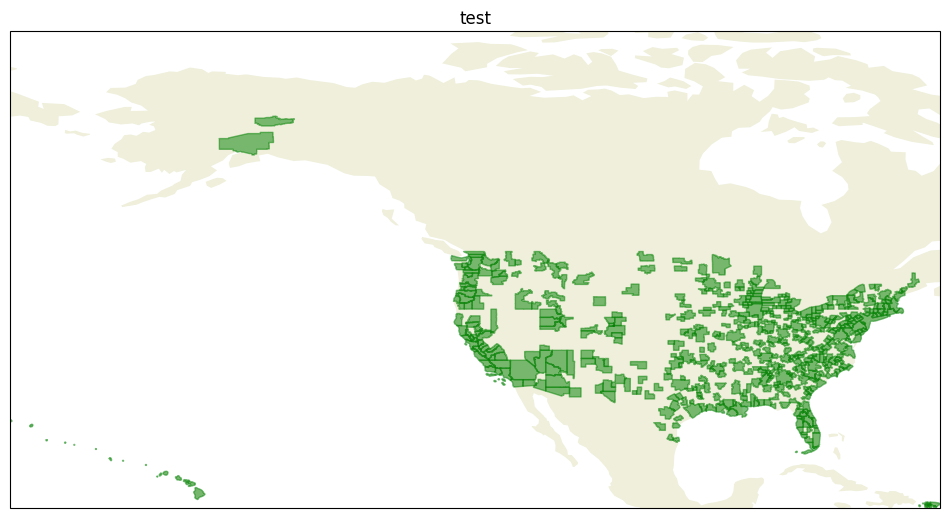

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cartopy.feature import LAND
from shapely import bounds, Polygon

def polygon_to_extent(polygon: Polygon):
    b = bounds(polygon)
    return [b[0], b[2], b[1], b[3]]

def create_cartopy_plot(figsize=(12, 8), title="test"):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_title(title)

    return fig, ax

# plot of all counties available
fig, ax = create_cartopy_plot()
ax.add_feature(LAND)
ax.add_geometries(combined_gdf.geometry, color='green', alpha=.5, crs=ccrs.PlateCarree())
ax.set_extent(polygon_to_extent(all_counties_polygon))

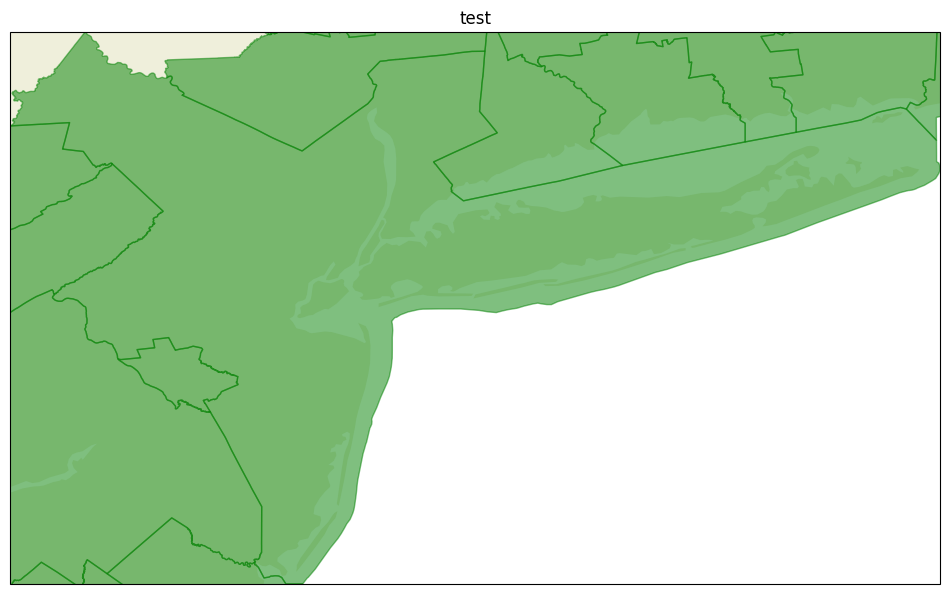

In [51]:
# plot of NY city
fig, ax = create_cartopy_plot()
ax.add_feature(LAND)
ax.add_geometries(combined_gdf.geometry, color='green', alpha=.5, crs=ccrs.PlateCarree())
ax.set_extent(polygon_to_extent(combined_gdf.iloc[338].geometry))

In [54]:
# sanity check, get all burger kings in this area
ny_fast_food_gdf = fast_food_gdf[fast_food_gdf.geometry.within(combined_gdf.iloc[338].geometry)]
ny_burger_kings = ny_fast_food_gdf[ny_fast_food_gdf['Restaurant'] == 'Burger King']
ny_burger_kings

,OBJECTID,ID,Letter,Address,City,State,Zip,Phone,Lat,Long_,Restaurant,geometry
84,85,85,b,260 Plainfield Avenue,Edison,NJ,8817,(201) 985-9733,40.5135,-74.4033,Burger King,POINT (-74.40330 40.51350)
135,136,136,b,500 Fulton Avenue,Hempstead,NY,11550,(516) 565-9462,40.7099,-73.6145,Burger King,POINT (-73.61450 40.70990)
139,140,140,b,179-08 Hillside Avenue,Jamaica,NY,11432,(718) 658-5047,40.7124,-73.7841,Burger King,POINT (-73.78410 40.71240)
169,170,170,b,628 West Montauk Highway,West Babylon,NY,11704,(631) 669-1784,40.6858,-73.3451,Burger King,POINT (-73.34510 40.68580)
205,206,206,b,110 Northern Boulevard,Greenvale,NY,11548,(516) 484-4774,40.8090,-73.6293,Burger King,POINT (-73.62930 40.80900)
...,...,...,...,...,...,...,...,...,...,...,...,...
7343,7344,7344,b,500 Lyons Avenue,Irvington,NJ,7111,(973) 923-7286,40.7157,-74.2251,Burger King,POINT (-74.22510 40.71570)
7362,7363,7363,b,147 New Brunswick Avenue,Hopelawn,NJ,8863,(),40.5243,-74.2973,Burger King,POINT (-74.29730 40.52430)
7387,7388,7388,b,"1886 3rd Avenue, (Spanish Harlem)",New York,NY,10029,(),40.7905,-73.9456,Burger King,POINT (-73.94560 40.79050)
7398,7399,7399,b,500 Waverly Avenue,Patchogue,NY,11772,(631) 207-0050,40.7821,-73.0370,Burger King,POINT (-73.03700 40.78210)


<GeoAxes: title={'center': 'test'}>

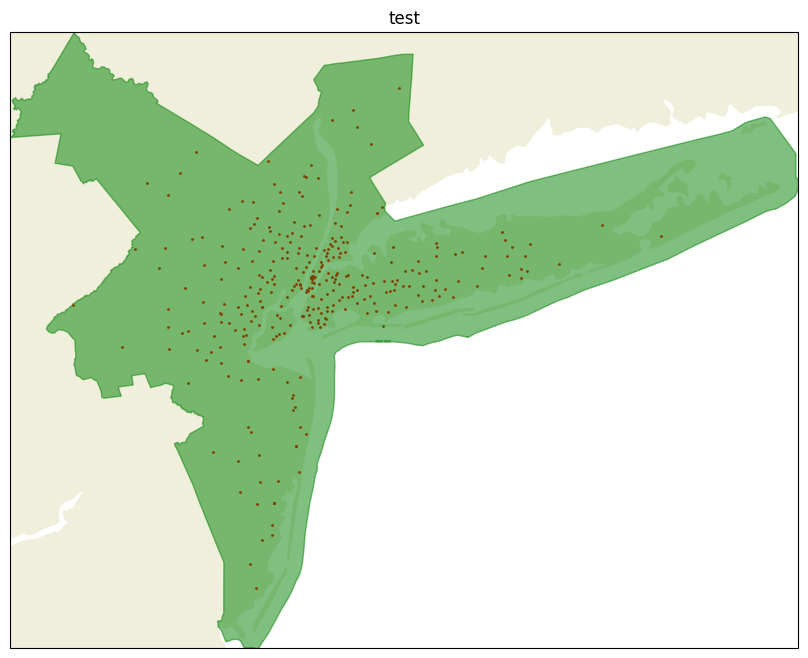

In [62]:
# plot of all Burger Kings in NY Area
ny_geom = combined_gdf.iloc[338].geometry
fig, ax = create_cartopy_plot()
ax.add_feature(LAND)
ax.add_geometries([ny_geom], color='green', alpha=.5, crs=ccrs.PlateCarree())
ax.set_extent(polygon_to_extent(ny_geom))

ny_burger_kings.plot(ax=ax, markersize=1, color='red')

In [71]:
# full join with aggregation, just do restaurant count for now
temp = combined_gdf.sjoin(fast_food_gdf, how='inner', predicate='covers')
temp = temp.groupby(['name', 'area_flag', 'median_household_income_est', 'geometry'])['Address'].count().to_frame().reset_index()
temp = temp.rename(columns={'Address': 'restaurant_count'})
temp


,name,area_flag,median_household_income_est,geometry,restaurant_count
0,"Aberdeen, WA Micro Area",M2,61026,"POLYGON ((-124.30542 47.24464, -124.30637 47.2...",10
1,"Abilene, TX Metro Area",M1,54808,"POLYGON ((-100.14654 32.52279, -100.14642 32.5...",22
2,"Adrian, MI Micro Area",M2,53865,"POLYGON ((-84.36198 41.89876, -84.36198 41.898...",17
3,"Akron, OH Metro Area",M1,57158,"POLYGON ((-81.39169 41.34827, -81.39164 41.348...",146
4,"Alamogordo, NM Micro Area",M2,39371,"POLYGON ((-106.37642 32.91041, -106.37644 32.9...",9
...,...,...,...,...,...
505,"York-Hanover, PA Metro Area",M1,69172,"POLYGON ((-77.05440 40.02321, -77.05441 40.023...",58
506,"Youngstown-Warren-Boardman, OH-PA Metro Area",M1,48558,"POLYGON ((-81.00229 41.13419, -81.00232 41.145...",110
507,"Yuba City, CA Metro Area",M1,61307,"POLYGON ((-121.62376 39.29562, -121.62339 39.2...",23
508,"Yuma, AZ Metro Area",M1,46419,"POLYGON ((-114.76378 32.64340, -114.76342 32.6...",33


In [74]:
# sanity check: make sure high counts are for metropolitan areas with known high population
temp.sort_values('restaurant_count', ascending=False).head(5)

,name,area_flag,median_household_income_est,geometry,restaurant_count
267,"Los Angeles-Long Beach-Anaheim, CA Metro Area",M1,77774,"MULTIPOLYGON (((-118.12590 33.69715, -118.1557...",2116
325,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",M1,83160,"POLYGON ((-74.88982 40.78773, -74.88971 40.787...",1564
82,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",M1,75379,"POLYGON ((-88.60224 41.63139, -88.61185 41.631...",1315
108,"Dallas-Fort Worth-Arlington, TX Metro Area",M1,72265,"POLYGON ((-97.92164 33.00128, -97.92153 33.008...",993
201,"Houston-The Woodlands-Sugar Land, TX Metro Area",M1,69193,"POLYGON ((-95.80431 30.24557, -95.80429 30.247...",944


In [73]:
# check low end
temp.sort_values('restaurant_count').head(5)

,name,area_flag,median_household_income_est,geometry,restaurant_count
451,"Sunbury, PA Micro Area",M2,47349,"POLYGON ((-76.86143 41.03318, -76.86143 41.033...",7
362,"Port Angeles, WA Micro Area",M2,57126,"POLYGON ((-123.15163 47.86688, -123.15261 47.8...",8
425,"Shelton, WA Micro Area",M2,63983,"POLYGON ((-122.81343 47.30681, -122.81423 47.3...",8
26,"Auburn, NY Micro Area",M2,58665,"POLYGON ((-76.73797 42.96129, -76.73771 42.961...",8
330,"Oak Harbor, WA Micro Area",M2,72066,"POLYGON ((-122.86272 48.26269, -122.86273 48.2...",8
